In [1]:
import numpy as np
import pandas as pd 
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import f1_score
from sklearn.model_selection import train_test_split

<center>
<div dir=rtl style="line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
    
|نام ویژگی|توضیحات|
|:------:|:---:|
| age | سن مشتری |
| job | نوع شغل |
| marital | وضعیت تاهل |
| education | وضعیت تحصیلی مشتری |
| default | وجود اعتبار در وام؟ |
| housing | وجود وام مسکن؟ |
| loan | وجود وام شخصی؟ |
| contact | نوع ارتباط با مشتری |
| month | ماه آخرین تماس در سال |
| day_of_week | روز هفته آخرین تماس |
| duration | مدت زمان آخرین تماس، به ثانیه. توجه: این ویژگی تأثیر زیادی بر روی نتیجه نهایی دارد (به عنوان مثال، اگر مدت زمان برابر با ۰ باشد، آنگاه y='no' است). مدت زمان قبل از انجام تماس مشخص نیست و بعد از پایان تماس، y به طور واضح مشخص می‌شود. بنابراین، این ورودی فقط برای اهداف مقایسه‌ای باید در نظر گرفته شود و اگر هدف دارید یک مدل پیش‌بینی واقعی ایجاد کنید، باید آنرا نادیده بگیرید |
| campaign | تعداد تماس‌های انجام شده در این کمپین برای این مشتری |
| pdays | تعداد روزهای گذشته پس از آخرین تماس با مشتری در کمپین قبلی (عددی؛ ۹۹۹ به معنای عدم تماس قبلی با مشتری است) |
| previous | تعداد تماس‌های انجام شده قبل از این کمپین برای این مشتری |
| poutcome | نتیجه کمپین بازاریابی قبلی |
| emp.var.rate | نرخ تغییرات متغیرهای اقتصادی مصرف‌کننده |
| cons.price.idx | شاخص قیمت‌های مصرف‌کننده |
| cons.conf.idx | شاخص اعتماد مصرف‌کننده |
| euribor3m | نرخ سپرده به یورو برای یک دوره ۳ ماهه|
| nr.employed | تعداد کارمندان |
| y |آیا مشتری سپرده مدت دار را ثبت کرده است؟|










    
</font>
</div>
</center>

In [2]:
train_data = pd.read_csv('../data/train.csv', na_values = 'unknown')
test_data = pd.read_csv('../data/test.csv', na_values = 'unknown')

In [3]:
train_data.isna().sum()

age                  0
job                293
marital             68
education         1555
default           7731
housing            903
loan               903
contact              0
month                0
day_of_week          0
duration             0
campaign             0
pdays                0
previous             0
poutcome             0
emp_var_rate         0
cons_price_idx       0
cons_conf_idx        0
euribor3m            0
nr_employed          0
y                    0
dtype: int64

In [4]:
test_data.isna().sum()

age                 0
job                37
marital            12
education         176
default           866
housing            87
loan               87
contact             0
month               0
day_of_week         0
duration            0
campaign            0
pdays               0
previous            0
poutcome            0
emp_var_rate        0
cons_price_idx      0
cons_conf_idx       0
euribor3m           0
nr_employed         0
dtype: int64

In [5]:
train_data.isna().sum()

age                  0
job                293
marital             68
education         1555
default           7731
housing            903
loan               903
contact              0
month                0
day_of_week          0
duration             0
campaign             0
pdays                0
previous             0
poutcome             0
emp_var_rate         0
cons_price_idx       0
cons_conf_idx        0
euribor3m            0
nr_employed          0
y                    0
dtype: int64

In [6]:
test_data.isna().sum()

age                 0
job                37
marital            12
education         176
default           866
housing            87
loan               87
contact             0
month               0
day_of_week         0
duration            0
campaign            0
pdays               0
previous            0
poutcome            0
emp_var_rate        0
cons_price_idx      0
cons_conf_idx       0
euribor3m           0
nr_employed         0
dtype: int64

In [7]:
train_data=train_data.fillna(value={'job':'admin.', 'education':'university.degree', 'marital':'married', 'default':'no', 'housing':'yes', 'loan':'no'})

In [8]:
test_data=test_data.fillna(value={'job':'admin.', 'education':'university.degree', 'marital':'married', 'default':'no', 'housing':'yes', 'loan':'no'})

In [9]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37069 entries, 0 to 37068
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             37069 non-null  int64  
 1   job             37069 non-null  object 
 2   marital         37069 non-null  object 
 3   education       37069 non-null  object 
 4   default         37069 non-null  object 
 5   housing         37069 non-null  object 
 6   loan            37069 non-null  object 
 7   contact         37069 non-null  object 
 8   month           37069 non-null  object 
 9   day_of_week     37069 non-null  object 
 10  duration        37069 non-null  int64  
 11  campaign        37069 non-null  int64  
 12  pdays           37069 non-null  int64  
 13  previous        37069 non-null  int64  
 14  poutcome        37069 non-null  object 
 15  emp_var_rate    37069 non-null  float64
 16  cons_price_idx  37069 non-null  float64
 17  cons_conf_idx   37069 non-null 

In [10]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4119 entries, 0 to 4118
Data columns (total 20 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             4119 non-null   int64  
 1   job             4119 non-null   object 
 2   marital         4119 non-null   object 
 3   education       4119 non-null   object 
 4   default         4119 non-null   object 
 5   housing         4119 non-null   object 
 6   loan            4119 non-null   object 
 7   contact         4119 non-null   object 
 8   month           4119 non-null   object 
 9   day_of_week     4119 non-null   object 
 10  duration        4119 non-null   int64  
 11  campaign        4119 non-null   int64  
 12  pdays           4119 non-null   int64  
 13  previous        4119 non-null   int64  
 14  poutcome        4119 non-null   object 
 15  emp_var_rate    4119 non-null   float64
 16  cons_price_idx  4119 non-null   float64
 17  cons_conf_idx   4119 non-null   f

In [11]:
#Categorical Handeling
label_encoder_job = LabelEncoder()
train_data['job'] = label_encoder_job.fit_transform(train_data['job'])
test_data['job'] = label_encoder_job.transform(test_data['job'])

In [12]:
label_encoder_marital = LabelEncoder()
train_data['marital'] = label_encoder_marital.fit_transform(train_data['marital'])
test_data['marital'] = label_encoder_marital.transform(test_data['marital'])

In [13]:
label_encoder_default = LabelEncoder()
train_data['default'] = label_encoder_default.fit_transform(train_data['default'])
test_data['default'] = label_encoder_default.transform(test_data['default'])

In [14]:
label_encoder_housing = LabelEncoder()
train_data['housing'] = label_encoder_housing.fit_transform(train_data['housing'])
test_data['housing'] = label_encoder_housing.transform(test_data['housing'])

In [15]:
label_encoder_loan = LabelEncoder()
train_data['loan'] = label_encoder_loan.fit_transform(train_data['loan'])
test_data['loan'] = label_encoder_loan.transform(test_data['loan'])

In [16]:
label_encoder_contact = LabelEncoder()
train_data['contact'] = label_encoder_contact.fit_transform(train_data['contact'])
test_data['contact'] = label_encoder_contact.transform(test_data['contact'])

In [17]:
mapping_month = {"jan" : 1,
            "feb" : 2,
            "mar" : 3,
            "apr" : 4,
            "may" : 5,
            "jun" : 6,
            "jul" : 7,
            "aug" : 8,
            "sep" : 9,
            "oct" : 10,
            "nov" : 11,
            "dec" : 12}
train_data['month'] = train_data['month'].map(mapping_month)
test_data['month'] = test_data['month'].map(mapping_month)

In [18]:
mapping_day_of_week = {"mon" : 1,
            "tue" : 2,
            "wed" : 3,
            "thu" : 4,
            "fri" : 5,
            "sat" : 6,
            "sun" : 7,}
train_data['day_of_week'] = train_data['day_of_week'].map(mapping_day_of_week)
test_data['day_of_week'] = test_data['day_of_week'].map(mapping_day_of_week)

In [19]:
mapping_poutcome = {'failure' : -1 ,
            'nonexistent' : 0 ,
            'success' : 1
                      }
train_data['poutcome'] = train_data['poutcome'].map(mapping_poutcome)
test_data['poutcome'] = test_data['poutcome'].map(mapping_poutcome)

In [20]:
mapping_education = {"illiterate" : 0,
            "basic.4y" : 1,
            "basic.6y" : 2,
            "basic.9y" : 3,
            "high.school" : 4,
            "professional.course" : 5,
            "university.degree" : 6
                      }
train_data['education'] = train_data['education'].map(mapping_education)
test_data['education'] = test_data['education'].map(mapping_education)

In [21]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37069 entries, 0 to 37068
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             37069 non-null  int64  
 1   job             37069 non-null  int32  
 2   marital         37069 non-null  int32  
 3   education       37069 non-null  int64  
 4   default         37069 non-null  int32  
 5   housing         37069 non-null  int32  
 6   loan            37069 non-null  int32  
 7   contact         37069 non-null  int32  
 8   month           37069 non-null  int64  
 9   day_of_week     37069 non-null  int64  
 10  duration        37069 non-null  int64  
 11  campaign        37069 non-null  int64  
 12  pdays           37069 non-null  int64  
 13  previous        37069 non-null  int64  
 14  poutcome        37069 non-null  int64  
 15  emp_var_rate    37069 non-null  float64
 16  cons_price_idx  37069 non-null  float64
 17  cons_conf_idx   37069 non-null 

In [22]:
train_data['y'].value_counts()

0    32903
1     4166
Name: y, dtype: int64

In [23]:
train_x = train_data.drop(['y'],axis=1)
train_y = train_data['y']

In [24]:
x_train,x_test,y_train,y_test = train_test_split(train_x, train_y, random_state=0, test_size =0.005)

In [25]:
# training model
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier
model_ada = AdaBoostClassifier(n_estimators=1000,learning_rate=0.5)
model_ada.fit(train_x,train_y)
#y_pred = model_ada.predict(x_test)

AdaBoostClassifier(learning_rate=0.5, n_estimators=1000)

In [26]:
from sklearn.neighbors import KNeighborsClassifier
modelknn = KNeighborsClassifier(n_neighbors=15)
modelknn.fit(train_x,train_y)
#y_pred_knn = modelknn.predict(x_test)

KNeighborsClassifier(n_neighbors=15)

In [27]:
from sklearn.linear_model import LogisticRegression 
model_logreg = LogisticRegression()
model_logreg.fit(train_x,train_y)
#y_pred_lr = model_logreg.predict(x_test)

d:\quera\qenv\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [28]:
from sklearn.ensemble import RandomForestClassifier
model_rfc = RandomForestClassifier(criterion = 'entropy', random_state = 42)
model_rfc.fit(train_x,train_y)
#y_pred_rfc = model_rfc.predict(x_test)

RandomForestClassifier(criterion='entropy', random_state=42)

In [29]:
from xgboost import XGBClassifier
model_xgb = XGBClassifier()
model_xgb.fit(train_x,train_y)
#y_pred_xgb = model_xgb.predict(x_test)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,
              grow_policy='depthwise', importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_bin=256, max_cat_threshold=64, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0, ...)

In [33]:
from lightgbm import LGBMClassifier

In [34]:
model = LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
               random_state=123, reg_alpha=0.0, reg_lambda=0.0, subsample=1.0,
               subsample_for_bin=200000, subsample_freq=0)
model.fit(train_x,train_y)
#y_pred_lgb = model.predict(x_test)

LGBMClassifier(random_state=123)

In [418]:
from sklearn.metrics import classification_report, f1_score
print(classification_report(y_test, y_pred))
print(f1_score(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.94      0.99      0.96       166
           1       0.83      0.50      0.62        20

    accuracy                           0.94       186
   macro avg       0.89      0.74      0.79       186
weighted avg       0.93      0.94      0.93       186

0.625


In [419]:
print(classification_report(y_test, y_pred_knn))
print(f1_score(y_test, y_pred_knn))

              precision    recall  f1-score   support

           0       0.96      0.97      0.96       166
           1       0.72      0.65      0.68        20

    accuracy                           0.94       186
   macro avg       0.84      0.81      0.82       186
weighted avg       0.93      0.94      0.93       186

0.6842105263157895


In [420]:
print(classification_report(y_test, y_pred_lr))
print(f1_score(y_test, y_pred_lr))

              precision    recall  f1-score   support

           0       0.94      0.98      0.96       166
           1       0.77      0.50      0.61        20

    accuracy                           0.93       186
   macro avg       0.86      0.74      0.78       186
weighted avg       0.92      0.93      0.92       186

0.6060606060606061


In [421]:
print(classification_report(y_test, y_pred_rfc))
print(f1_score(y_test, y_pred_rfc))

              precision    recall  f1-score   support

           0       0.95      0.97      0.96       166
           1       0.69      0.55      0.61        20

    accuracy                           0.92       186
   macro avg       0.82      0.76      0.78       186
weighted avg       0.92      0.92      0.92       186

0.6111111111111112


In [422]:
print(classification_report(y_test, y_pred_xgb))
print(f1_score(y_test, y_pred_xgb))

              precision    recall  f1-score   support

           0       0.96      0.95      0.95       166
           1       0.62      0.65      0.63        20

    accuracy                           0.92       186
   macro avg       0.79      0.80      0.79       186
weighted avg       0.92      0.92      0.92       186

0.6341463414634146


In [423]:
print(classification_report(y_test, y_pred_lgb))
print(f1_score(y_test, y_pred_lgb))

              precision    recall  f1-score   support

           0       0.95      0.96      0.96       166
           1       0.67      0.60      0.63        20

    accuracy                           0.92       186
   macro avg       0.81      0.78      0.79       186
weighted avg       0.92      0.92      0.92       186

0.631578947368421


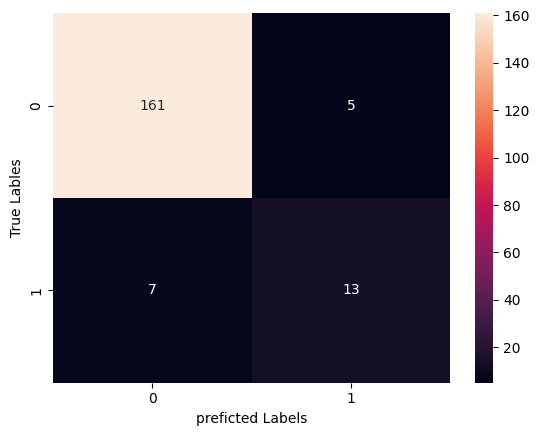

In [425]:
# Confusion Matrix
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

cm = confusion_matrix(y_test, y_pred_knn)


sns.heatmap(cm , annot=True ,fmt='d')
plt.xlabel("preficted Labels")
plt.ylabel("True Lables");

In [35]:
#TO-DO
submission = pd.DataFrame(model.predict(test_data))
submission.columns = ['prediction']

In [36]:
submission

,prediction
0,0
1,0
2,0
3,0
4,0
...,...
4114,0
4115,0
4116,0
4117,0
